In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd gdrive
%cd My Drive
%cd MAIN

/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/MAIN


In [0]:
import gensim
fs_tx = gensim.models.KeyedVectors.load_word2vec_format('cc.ru.300.vec')

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn import metrics
import math
%matplotlib inline

In [0]:
with open('./HMM/MAIN_CLOZE_NODE.json','r',encoding='gb2312') as fd:
    JSON_CLOZE = json.load(fd)

FileNotFoundError: ignored

In [0]:
with open('./HMM/MAIN_MAIN_NODE.json','r',encoding='utf8') as fd:
    JSON_LSTM = json.load(fd)

In [0]:
with open('./HMM/MAIN_2HMM_NODE.json','r',encoding='utf8') as fd:
    JSON_HMM = json.load(fd)

In [0]:
metrics = []

In [0]:
def cos_sim(a,b):
    return np.dot(a, b)/(np.linalg.norm(a)* np.linalg.norm(b))

In [0]:
cos_sim(fs_tx['привет'],fs_tx['приветик'])

0.79907835

In [0]:
JSON_CLOZE[0]['pred'][:10]

[['столе', 0.1678832116788321],
 ['на', 0.0364963503649635],
 ['дороге', 0.029197080291970802],
 ['золотом', 0.029197080291970802],
 ['улице', 0.029197080291970802],
 ['дереве', 0.021897810218978103],
 ['земле', 0.021897810218978103],
 ['берегу', 0.014598540145985401],
 ['дворе', 0.014598540145985401],
 ['диване', 0.014598540145985401]]

In [0]:
metrics = []
for i in range(len(JSON_CLOZE)):
    
    left_sum = np.zeros_like(np.arange(300),dtype=float)
    right_sum = np.zeros_like(np.arange(300),dtype=float)
    
    left_ = [j[0] for j in JSON_CLOZE[i]['pred'][:10]]
    right_ = [j[0] for j in JSON_LSTM[i]['pred'][:10]]

    for j in left_:
        try:
            left_sum+=fs_tx[j]
        except:
            pass
    
    for j in right_:
        try:
            right_sum+=fs_tx[j]
        except:
            pass
    
    metrics.append(cos_sim(left_sum,right_sum))

In [0]:
len(metrics)

1219

In [0]:
np.mean(metrics)

0.6434451858381969

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


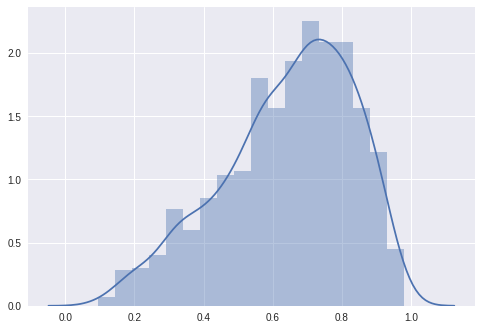

In [0]:
import seaborn as sns, numpy as np
sns.set()

ax = sns.distplot(metrics)
ax